In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.applications.nasnet import NASNetMobile, preprocess_input

In [ ]:
# !cp -r /content/drive/MyDrive/dataset-resized /content/garbage_dataset

In [ ]:

# Import Libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load Dataset
data_dir = '/content/garbage_dataset'
classes = os.listdir(data_dir)
print(classes)

# Image Preprocessing
img_size = (224, 224)
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

for layer in base_model.layers[:-15]:
    layer.trainable = False

# last 2 layers trainable
for layer in base_model.layers[-15:]:
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

['metal', 'plastic', 'cardboard', 'trash', 'paper', 'glass']
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_17          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │           7,686 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 1,047,686 (4.00 MB)

 Non-trainable params: 1,217,984 (4.65 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 487ms/step - accuracy: 0.6115 - loss: 1.1374 - val_accuracy: 0.5010 - val_loss: 4.5132
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.8889 - loss: 0.3405 - val_accuracy: 0.5427 - val_loss: 4.3177
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9546 - loss: 0.1503 - val_accuracy: 0.5467 - val_loss: 5.1624
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step - accuracy: 0.9689 - loss: 0.0908 - val_accuracy: 0.4652 - val_loss: 10.2407
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.9813 - loss: 0.0584 - val_accuracy: 0.4135 - val_loss: 14.8084
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.3141 - val_loss: 19.7662
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.9880 - loss: 0.0359 - val_accuracy: 0.4056 - val_loss: 14.1053
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9886 - loss: 0.0370 - val_accuracy: 0.389

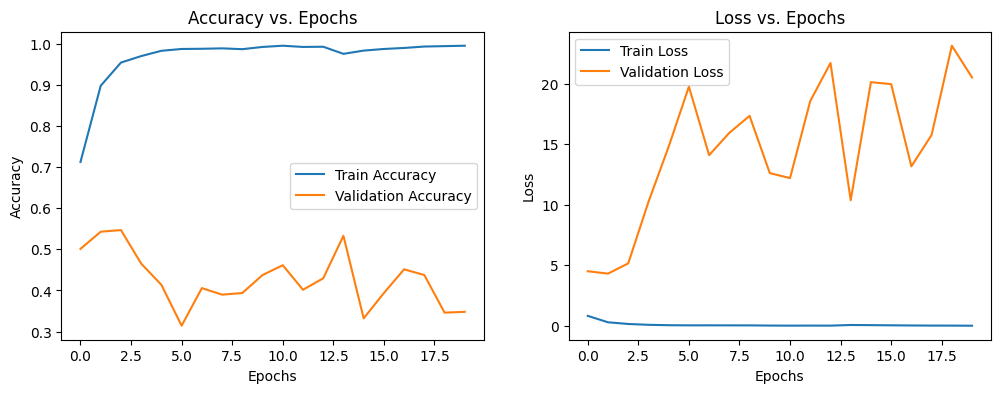

In [ ]:
epochs = 20

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

# Plot Accuracy and Loss
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
model.save("garbage_classification_tf3_mobilenet.h5")


In [ ]:
loaded_model = tf.keras.models.load_model("/content/garbage_classification_tf3_nasnet.h5")

labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
!cp //content/converted_model.tflite /content/drive/MyDrive/

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model("garbage_classification_tf3_nasnet.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
file = open( '2converted_model.tflite' , 'wb' )
file.write( tflite_model )

Saved artifact at '/tmp/tmpfckm1gf2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_29')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  139148957113280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955606656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955603840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148957107824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148957109936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955603664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955599968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955599440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955601904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955607008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148955600

17107312

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted: trash


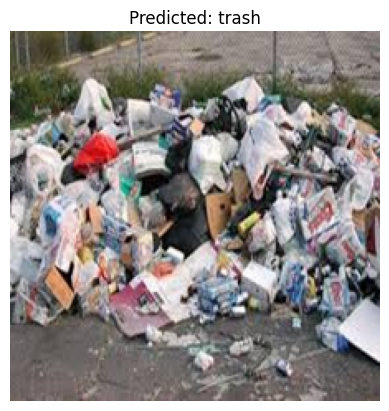

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_labels, img_size=(224, 224)):

    image = Image.open(image_path).resize(img_size)
    image_array = np.array(image) / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    prediction = model.predict(image_array)
    predicted_class = class_labels[np.argmax(prediction)]  # Get predicted class

    print(f"Predicted: {predicted_class}")
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

image_path = '/content/trash.jpg'
predict_image(image_path, loaded_model, labels)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


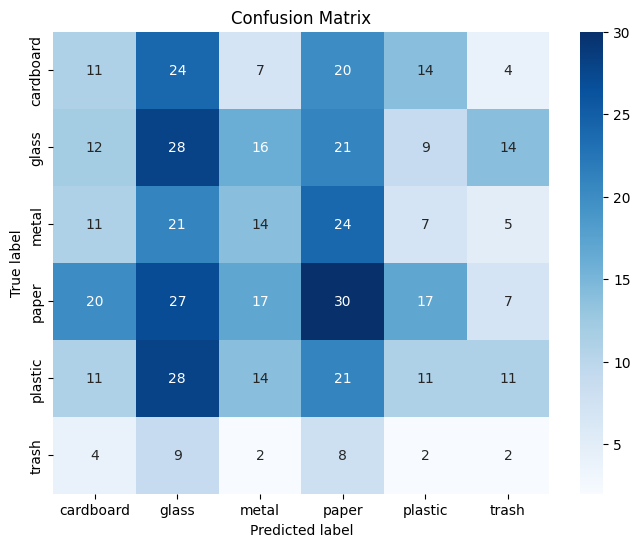

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = val_gen.classes
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
